In [330]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load loan.csv file into system

In [331]:
loanDataset = pd.read_csv(r'loan.csv')

C:\Users\hp\AppData\Local\Temp\ipykernel_9180\3134072375.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loanDataset = pd.read_csv(r'loan.csv')


In [332]:
backupLoadDataset = loanDataset.copy()

## Quick Data View

In [333]:
loanDataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Generate Metadata of the Data

- **Count** of rows the Dataset
- **Datatype description** of the rows as understood by Python
- **Columns with NA** Records in Python
- **Count of Columns** In the Dataset 

### Count of Rows in the Dataset

In [334]:
print("Total Number of Rows in the Dataset is: ", len(loanDataset.index))

Total Number of Rows in the Dataset is:  39717


### Datatype of the columns in the dataset

In [335]:
loanDataset.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

### Columns with more than 90% Null Values in the Dataset

In [336]:
# List of Columns with more than 90% data as Null

countOfNull = pd.DataFrame(round((loanDataset.isnull().sum()/len(loanDataset.index))*100,2))
countOfNull.rename(columns = {0:'Percentage of Nulls'},inplace = True)
countOfNull[countOfNull['Percentage of Nulls'] > 90].head(10)

,Percentage of Nulls
mths_since_last_record,92.99
next_pymnt_d,97.13
mths_since_last_major_derog,100.00
annual_inc_joint,100.00
dti_joint,100.00
verification_status_joint,100.00
tot_coll_amt,100.00
tot_cur_bal,100.00
open_acc_6m,100.00
open_il_6m,100.00


### Count of Column in the Dataset

In [337]:
print("Total Number of Columns in the Dataset:", loanDataset.shape[1])

Total Number of Columns in the Dataset: 111


## Remove columns with more than 90% data as null

As these columns have almost 50% empty data they do not make any significant contributions to the EDA analysis. Also, since we cannot guess what these column values could be, it is best to not insert any dummy data into them and hence they can be dropped.

In [338]:
# Drop columns that have more than 90% data as null from the dataset.

listOfColumnsWithNull = countOfNull[countOfNull['Percentage of Nulls'] > 90].index.tolist()
loanDataset.drop(listOfColumnsWithNull,axis = 1,inplace = True)

## Removing unwanted columns which will have Zero impact in the EDA

- ***ID***: ID of a customer will have no impact on his/her not being able to repay the loan, hence can be ignored
- ***Member ID***: Similar to the ID, the member id who gave approved the loan will have zero or no impact

In [339]:
# Drop unwated columns from analysis
loanDataset.drop(['id','member_id'],axis = 1,inplace = True)

# Print the top 10 rows of the dataset
loanDataset.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,...,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,4 years,...,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Drop columns that give no information

- **Application Type**: All the data in this column is Individual and hence safe to drop the column from the analysis
- **acc_now_delinq**: All the data in this column is 0 and hence can be dropped from EDA
- **Policy Code**: The data provided entails to the single policy code and hence safe to drop the column from analysis
- **collections_12_mths_ex_med**: Have all the values as 0 and can be dropped from analysis
- **tax_liens**: Have all the values as 0 and can be dropped from analysis
- **chargeoff_within_12_mths**: Have all the values as 0 and can be dropped from analysis
- **delinq_amnt**: Have all the values as 0 and can be dropped from analysis
- **url**: As it is unique for each loan sanctioned
- **zip_code**: This information is already captured in addr_state

In [340]:
loanDataset.drop(['application_type','pymnt_plan','acc_now_delinq','collections_12_mths_ex_med','tax_liens','zip_code','desc','url','chargeoff_within_12_mths','delinq_amnt','policy_code','funded_amnt','funded_amnt_inv','issue_d','verification_status'],axis = 1, inplace = True)

<Axes: ylabel='annual_inc'>

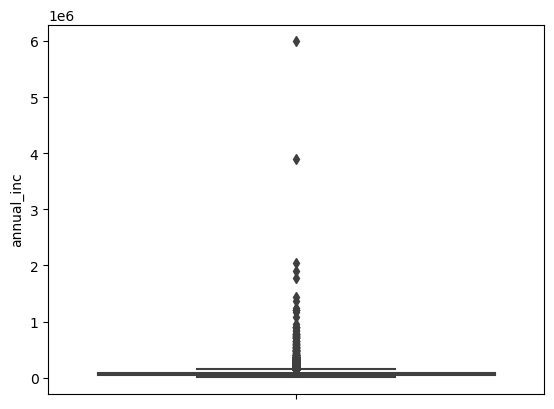

In [341]:
sns.boxplot(y = loanDataset['annual_inc'])

The data has outliers in the annual_income

In [342]:
Q_25 = loanDataset['annual_inc'].quantile(0.25)
Q_75 = loanDataset['annual_inc'].quantile(0.75)
IQR = Q_75 - Q_25

# Drop outlier records from analysis
copyLoanDatasetOutlierRemoved = loanDataset.drop(list(loanDataset[loanDataset['annual_inc'] > IQR*1.5].index), axis = 0)

<Axes: ylabel='annual_inc'>

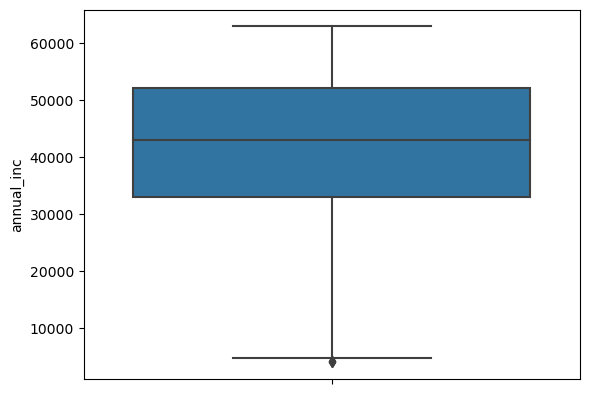

In [343]:
sns.boxplot(y = copyLoanDatasetOutlierRemoved['annual_inc'])

## Drop rows with NaN records

In [344]:
loanDataset.drop(loanDataset[loanDataset['emp_length'].isnull() == True].index.tolist(),axis = 0, inplace = True)
loanDataset.drop(loanDataset[loanDataset['emp_title'].isnull() == True].index.tolist(),axis = 0, inplace = True)

loanDataset.to_csv(r'C:\Users\hp\Desktop\ML & AL Program Upgrad\Source Files\loan\loanCleaned.csv')

In [345]:
loanDataset['int_rate'] = loanDataset['int_rate'].apply(lambda x: x.replace("%",""))
loanDataset['int_rate'] = loanDataset['int_rate'].astype(float)

In [346]:
loanDataset['emp_length'].unique()

array(['< 1 year', '10+ years', '1 year', '3 years', '8 years', '9 years',
       '5 years', '4 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [347]:
def experienceYearClassification(df):
    blankDataframe = pd.DataFrame(index = range(0,len(df['emp_length'])),columns = ['employee_exp'])
    blankDataframe['employee_exp'] = df['emp_length']
    
    for i in range(0,len(df['emp_length'])):
        if df['emp_length'].iloc[i] in ['1 year','2 years', '3 years']:
            blankDataframe['employee_exp'].iloc[i] = '1 - 3 years'
        elif df['emp_length'].iloc[i] in ['4 years', '5 years','6 years']:
            blankDataframe['employee_exp'].iloc[i] = '4 - 6 years'
        elif df['emp_length'].iloc[i] in ['7 years', '8 years','9 years']:
            blankDataframe['employee_exp'].iloc[i] = '7 - 9 years'
        else:
            blankDataframe['employee_exp'].iloc[i] = df['emp_length'].iloc[i]
    return blankDataframe['employee_exp']

In [348]:
#loanDataset['MonthName'] = loanDataset['issue_d'].apply(lambda x: x[:3])

In [349]:
loanDataset['Experience_Years'] = experienceYearClassification(loanDataset)

## Looking at the average and median values of income and interest rate against Loan Status

### Annual Income, Interest Rate & Loan Amount (Affects)
- Looking at the below numbers, it is clear that the people who defaulted (charged off) have lower income by 10% as against the people who Fully Paid the Load.
- Secondly, as can be observed from the numbers, the interest rate plays a vital role. At the look of the the interest rate of people charged off is more than those who are able to fully pay the load
- Thirdly, even though the income of the people who charge off is less than the avg income of the people who don't with same experience level, the amount of loan taken by the people who charged off is generally higher than people who repay the loan in time.

Hence, people are likely to default less if the ***interest rate is reduced***

### Verified Status (Doesn't)
- As can be seen from below, ***verification status does not*** have much to do with the charge off. We can see a lot of unverified income people able to repay their loan

### Loan Time Period (Affects)
- There is a 22% point dip in the people who payoff the loan when taking loan for 60 months (67%) as compared to those taking for 36 months (89%).
- Also, the interest rate of loan on an avg for 60 months period is more than for 36 months period
- At the same time % of people not being able to pay increase from 10% to 22% from 36 to 60 months

### Installment (Doesn't)

In [350]:
# Create a pivot table to check the median income for people grouped by loan status

pd.pivot_table(loanDataset,values = ['int_rate','annual_inc','loan_amnt'],index = ['loan_status'],aggfunc = {'int_rate':"median",'annual_inc':"median",'loan_amnt':'median'})

,annual_inc,int_rate,loan_amnt
loan_status,,,
Charged Off,54000.0,13.61,10000
Current,65000.0,14.65,16000
Fully Paid,60000.0,11.49,9600


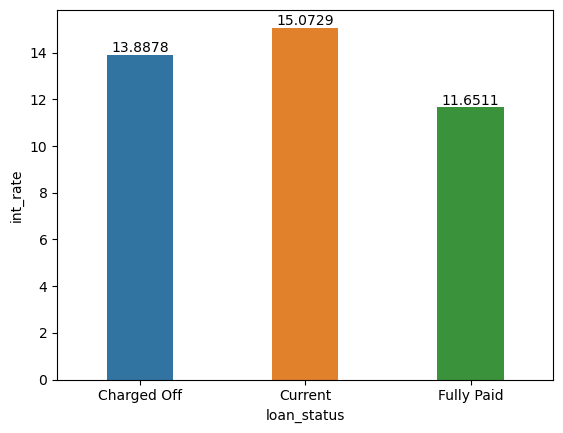

In [351]:
AvgInterestRate = pd.pivot_table(loanDataset,values = ['int_rate','annual_inc','loan_amnt'],index = ['loan_status'],aggfunc = {'int_rate':"mean",'annual_inc':"mean",'loan_amnt':"mean"})
AvgInterestRate = AvgInterestRate.reset_index()
ax = sns.barplot(data = AvgInterestRate,x = 'loan_status',y = 'int_rate', width = 0.4)
for i in ax.containers:
    ax.bar_label(i,)

In general people who default pay more interest than people who are not

In [352]:
pd.pivot_table(loanDataset,values = ['int_rate','annual_inc','loan_amnt','installment'],index = ['loan_status','term'],aggfunc = {'int_rate':"median",'annual_inc':"median",'loan_amnt':"median",'installment':'median'})

annual_inc  installment  int_rate  loan_amnt
loan_status term                                                    
Charged Off  36 months     50000.0      262.330     12.53       8000
             60 months     59020.0      348.385     16.02      15000
Current      60 months     65000.0      369.210     14.65      16000
Fully Paid   36 months     58000.0      264.440     10.99       8000
             60 months     65000.0      318.220     14.27      14500

<Axes: xlabel='loan_status', ylabel='Experience_Years'>

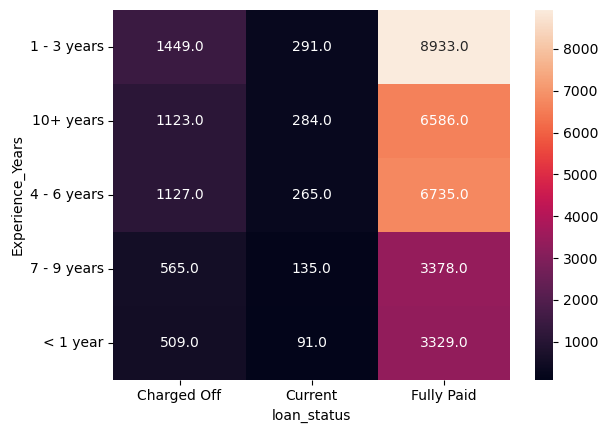

In [353]:
#pd.pivot_table(loanDataset,values = ['int_rate','annual_inc','loan_amnt'],index = ['purpose','loan_status'],aggfunc = {'loan_status':len,'int_rate':"mean",'annual_inc':"mean",'loan_amnt':"mean"})

ChargedOffPerState = pd.pivot_table(loanDataset, index = ['loan_status','Experience_Years'],aggfunc = {'Experience_Years':len})
ChargedOffPerState.rename({'Experience_Years':'Count_Experience_Years'},axis = 1,inplace = True)
ChargedOffPerState = ChargedOffPerState.reset_index()
heatmapPivot = ChargedOffPerState.pivot(columns = "loan_status",index ="Experience_Years",values = "Count_Experience_Years")
sns.heatmap(heatmapPivot, annot=True, fmt=".1f")
#heatmapPivot

#loanDataset

In [354]:
loanDataset.columns.values

array(['loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'loan_status', 'purpose', 'title', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies',
       'Experience_Years'], dtype=object)

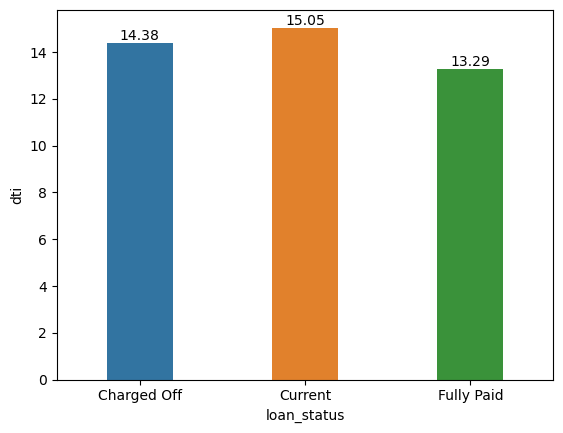

In [355]:
dti_scores = pd.pivot_table(loanDataset,index = ['loan_status'],values = ['dti'],aggfunc = {'dti':"median"})
dti_scores = dti_scores.reset_index()
ax = sns.barplot(dti_scores,x = 'loan_status', y = 'dti',width = 0.4)
for i in ax.containers:
    ax.bar_label(i,)

In general, people with higher DTI scores are likely to default

Text(0, 0.5, 'Percentage Split of Loan Status -->')

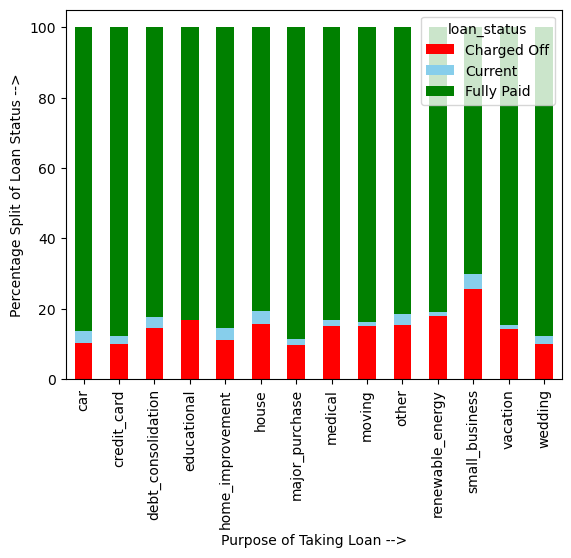

In [356]:
PurposeAgainstChargeOff = pd.DataFrame(round((loanDataset[['purpose','loan_status']].groupby(['purpose','loan_status']).size()/loanDataset[['purpose','loan_status']].groupby(['purpose']).size())*100,2))
PurposeAgainstChargeOff = pd.pivot_table(PurposeAgainstChargeOff.reset_index(),index = ['purpose'], columns = ['loan_status'], values = 0, aggfunc = {0:"mean"})
#PurposeAgainstChargeOff
PurposeAgainstChargeOff.plot(kind = 'bar',stacked = True,color = ['red', 'skyblue', 'green'])
# labels for x & y axis
plt.xlabel('Purpose of Taking Loan -->')
plt.ylabel('Percentage Split of Loan Status -->')

In [357]:
PurposeAgainstChargeOff

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,10.40,3.29,86.31
credit_card,10.14,2.07,87.78
debt_consolidation,14.56,3.14,82.29
educational,16.72,NaN,83.28
home_improvement,11.24,3.30,85.46
house,15.71,3.71,80.57
major_purchase,9.77,1.72,88.51
medical,15.04,1.86,83.10
moving,15.19,1.11,83.70


People taking loan for small business are more likely to default on the loan as compared to others

[Text(0.5, 0, 'Grade -->'), Text(0, 0.5, 'Frequency of Grade -->')]

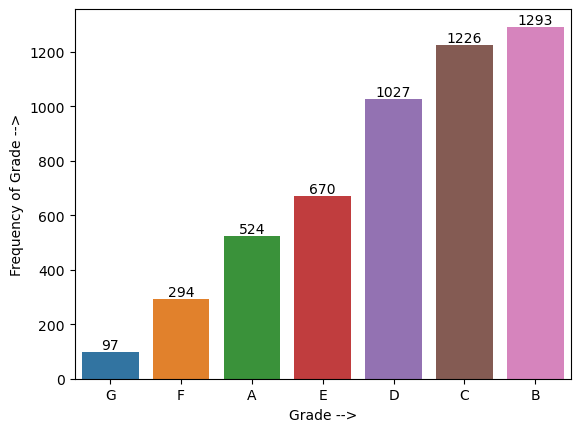

In [358]:
gradeWiseIncrease = pd.pivot_table(loanDataset[loanDataset['loan_status'] == 'Charged Off'],index = ['grade'], aggfunc = {'grade':len})
gradeWiseIncrease.rename({'grade':'Count Of Grade'},inplace = True, axis = 1)
ax = sns.barplot(gradeWiseIncrease.reset_index().sort_values("Count Of Grade"),x = "grade",y = "Count Of Grade")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set(xlabel='Grade -->', ylabel='Frequency of Grade -->')

Within the Charged Off Category, the Grade B, seems to have the higher distribution or Grade B seem to be the one where people default the most

[Text(0.5, 0, 'Frequency -->'), Text(0, 0.5, 'Years of Experience -->')]

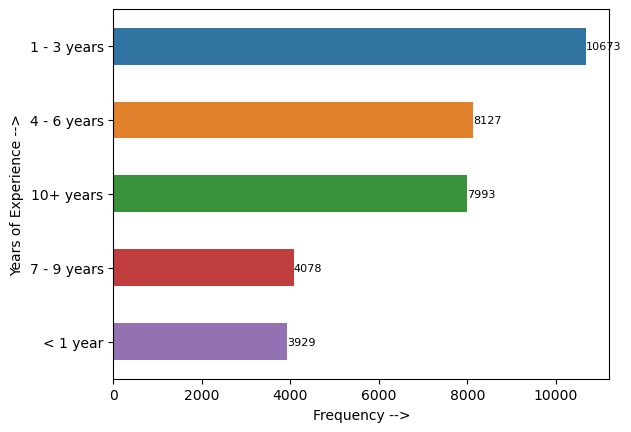

In [414]:
experience_distribution = pd.pivot_table(loanDataset,index = ['Experience_Years'], aggfunc = {'Experience_Years':len}).rename({"Experience_Years":'Frequency Experience'},axis = 1)
ax = sns.barplot(experience_distribution.reset_index().sort_values("Frequency Experience", ascending = False),y = "Experience_Years",x = "Frequency Experience",orient = 'h',width=0.5)
ax.bar_label(ax.containers[0], fontsize=8)
ax.set(xlabel='Frequency -->', ylabel='Years of Experience -->')

**The dataset contains a large number of group of people with experience between the group 1 to 3 years**

<Axes: xlabel='annual_inc', ylabel='Density'>

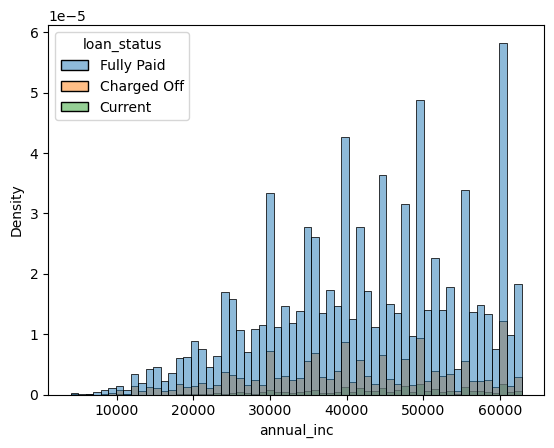

In [360]:
#sns.stripplot(loanDataset, x = 'emp_length', y = 'annual_inc',hue = 'loan_status')
sns.histplot(copyLoanDatasetOutlierRemoved, x = 'annual_inc',stat = 'density',bins = 60,hue = 'loan_status')

categorizeByHomeOwnership = pd.pivot_table(copyLoanDatasetOutlierRemoved,index = ['home_ownership','loan_status'],aggfunc = {'loan_status':len})
categorizeByHomeOwnership.rename({'loan_status':'Count of Category'},axis = 1,inplace = 'True')
categorizeByHomeOwnership = categorizeByHomeOwnership.reset_index()
categorizeByHomeOwnership = categorizeByHomeOwnership.groupby(['home_ownership','loan_status']).sum()/(categorizeByHomeOwnership.groupby(['home_ownership']).sum())
categorizeByHomeOwnership
categorizeByHomeOwnership.drop('loan_status',axis = 1, inplace = True)
categorizeByHomeOwnership['Count of Category'] =  categorizeByHomeOwnership['Count of Category'] * 100
categorizeByHomeOwnership = pd.pivot_table(categorizeByHomeOwnership.reset_index(),index = ['home_ownership'], columns = ['loan_status'], values = ['Count of Category'], aggfunc = {'Count of Category':"sum"})
categorizeByHomeOwnership.plot(kind = 'bar', stacked = True, color = ['red', 'skyblue', 'green','yellow'])


**Public Record of Bankrupcies**

<Axes: xlabel='Frequency of Bankruptcies', ylabel='pub_rec_bankruptcies'>

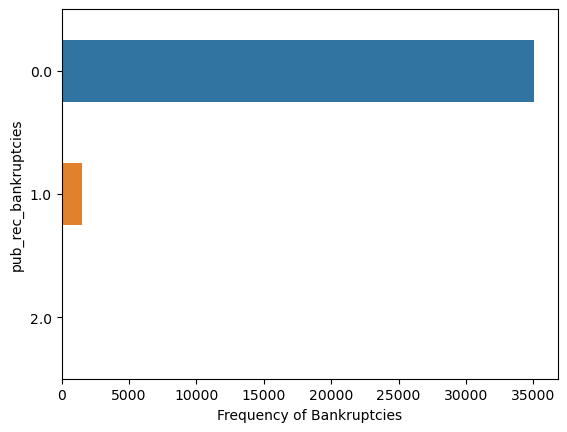

In [361]:
bankRuptcies = pd.pivot_table(loanDataset, index = ['pub_rec_bankruptcies'], aggfunc = {'pub_rec_bankruptcies':len})
bankRuptcies.rename({'pub_rec_bankruptcies':'Frequency of Bankruptcies'},inplace = True, axis = 1)
sns.barplot(bankRuptcies.reset_index(), x = 'Frequency of Bankruptcies', y = 'pub_rec_bankruptcies', width = 0.5, orient = 'h')

Almost no cases of 2 bankruptcies

In [370]:
bankRuptcies = pd.pivot_table(loanDataset,index = ['pub_rec_bankruptcies','loan_status'],aggfunc = {'loan_status':len})
bankRuptcies.rename({'loan_status':'Frequency'}, axis = 1, inplace = True)
bankRuptcies = bankRuptcies.reset_index()
bankRuptcies = bankRuptcies.groupby(['pub_rec_bankruptcies','loan_status']).sum()/bankRuptcies.groupby(['pub_rec_bankruptcies']).sum()
bankRuptcies.drop('loan_status',axis = 1, inplace = True)
bankRuptcies['Frequency'] = bankRuptcies['Frequency'] * 100

<Axes: xlabel='% of Value', ylabel='Public Record of Bankruptcies'>

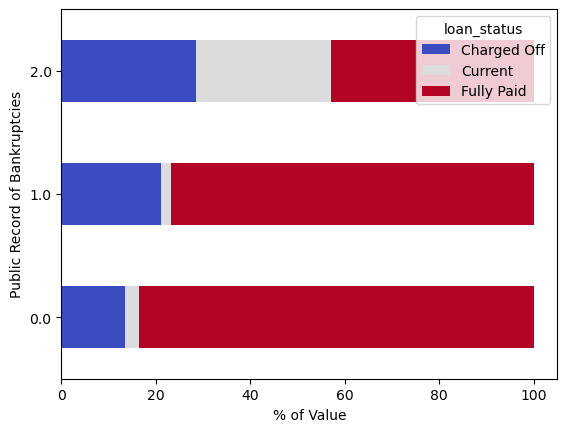

In [379]:
bankRuptciesPlot = pd.pivot_table(bankRuptcies.reset_index(), index = 'pub_rec_bankruptcies', columns = ['loan_status'], values = 'loan_status')
bankRuptciesPlot.plot(kind = 'barh', stacked = True, colormap = cm.coolwarm, xlabel = '% of Value',ylabel = 'Public Record of Bankruptcies')

# Impact of Public Derogatory Records 

In [387]:
pubDerogatory = pd.pivot_table(loanDataset,index = ['pub_rec','loan_status'],aggfunc = {'loan_status':len})
pubDerogatory.rename({'loan_status':'Frequency'}, axis = 1, inplace = True)
pubDerogatory = pubDerogatory.reset_index()
pubDerogatory = pubDerogatory.groupby(['pub_rec','loan_status']).sum()/pubDerogatory.groupby(['pub_rec']).sum()
pubDerogatory.drop('loan_status',axis = 1, inplace = True)
pubDerogatory['Frequency'] = pubDerogatory['Frequency'] * 100

<Axes: xlabel='% of Value', ylabel='Public Record of Derogatory Records'>

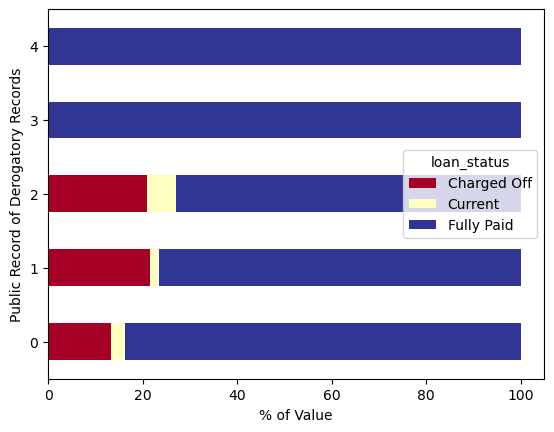

In [397]:
pubDerogatoryPlot = pd.pivot_table(pubDerogatory.reset_index(), index = 'pub_rec', columns = ['loan_status'], values = 'loan_status')
pubDerogatoryPlot.plot(kind = 'barh', stacked = True, colormap = cm.RdYlBu, xlabel = '% of Value',ylabel = 'Public Record of Derogatory Records')

# Impact of Addr State on Loan Status

[Text(0.5, 0, 'Frequency -->'), Text(0, 0.5, 'Name of State -->')]

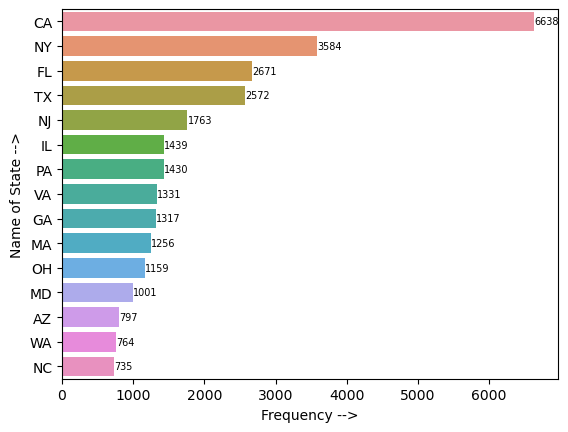

In [416]:
AddressSplit = pd.pivot_table(loanDataset, index = ['addr_state'], aggfunc = {'addr_state':len})
AddressSplit.rename({'addr_state':'Frequency'}, inplace = True, axis = 1)
AddressSplit = AddressSplit.reset_index()
AddressSplit = AddressSplit.sort_values("Frequency", ascending = False)
ax = sns.barplot(AddressSplit.head(15), x = 'Frequency', y = 'addr_state')
ax.bar_label(ax.containers[0], fontsize=7)
ax.set(xlabel='Frequency -->', ylabel='Name of State -->')

Most of the data are from the CA